# LAB3: PCA + LDA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "2" e "8"  dos dados (2000 dígitos de treino e 1000 de teste).
## a) Calcule a matriz de PCA para os 2000 dígitos de treino. Guarde só as componentes principais cujos valores próprios seja maiores que cem (100) e especifique (imprima) esse o número. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA aos dígitos  do conjunto de teste e faça a transformação inversa. Calcule o erro quadrático médio entre os dígitos de teste originais e os reconstruídos. Imprima o valor obtido.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle


In [14]:
dataDir='/home/gcm/gcm/aulas/AA/aulas/Praticas/LAB3-PCA_LDA/src/'
D=pickle.load(open(dataDir+'MNISTsmall.p','rb'))

X=D['X']*1.0
y=D['trueClass']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]
X1=X1[:,(y1==2) | (y1==8)] #dígitos de treino 2 e 8
X2=X2[:,(y2==2) | (y2==8)] #dígitos de teste 2 e 8


### Pergunta 1.a)

In [20]:
Cx=np.cov(X1)
u,V=la.eig(Cx)
u=u.real
V=V.real
idx=np.argsort(-u)
u=u[idx]
V=V[:,idx]
V=V[:,u>100]
nCPs=V.shape[1]
print('Nº de componentes principais:',nCPs)

#matriz de transformação (75% da variância)
W=V[:,:nCPs]


Nº de componentes principais: 419


### Pergunta 1.b)

Text(0.5, 1.0, '$CP_3$')

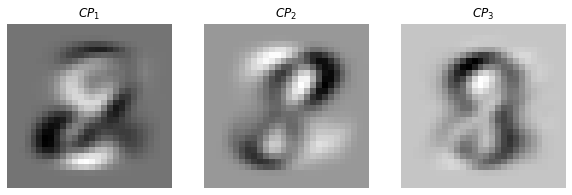

In [11]:
#1ªs 3 CPs
w1=W[:,0].reshape(28,28)
w2=W[:,1].reshape(28,28)
w3=W[:,2].reshape(28,28)
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(w1,cmap='binary')
plt.axis('off')
plt.title('$CP_1$')
plt.subplot(132)
plt.imshow(w2,cmap='binary')
plt.axis('off')
plt.title('$CP_2$')
plt.subplot(133)
plt.imshow(w3,cmap='binary')
plt.axis('off')
plt.title('$CP_3$')

### Pergunta 1.c)

In [21]:
#dados transformados
X2p=np.dot(W.T,X2)
#dados reconstruídos
X2r=np.dot(W,X2p)
#EQM
E=np.mean((X2-X2r)**2)
print('Erro Quadrático Médio: %.2f'%E)


Erro Quadrático Médio: 12.47


# Pergunta 2: Considere os dígitos "1", "4" e "7" dos dados (3000 dígitos de treino e 1500 dígitos de teste).
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $90\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Pretende-se aplicar a transformação LDA aos dados processados com PCA. Estime a transformação LDA com os dados de treino e aplique a transformação aos dados de treino e teste. Faça um "plot"  dos dados de teste por classe no mesmo gráfico.
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

### Perguntas 2.a) e 2.b)

In [35]:
from sklearn.decomposition import PCA
dataDir='/home/gcm/gcm/aulas/AA/aulas/Praticas/LAB3-PCA_LDA/src/'
D=pickle.load(open(dataDir+'MNISTsmall.p','rb'))

X=D['X']*1.0
y=D['trueClass']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]

X1=X1[:,(y1==1) | (y1==4) | (y1==7)] #dígitos de treino 1, 4 e 7
y1=y1[(y1==1) | (y1==4) | (y1==7)]
X2=X2[:,(y2==1) | (y2==4) | (y2==7)] #dígitos de teste 1, 4 e 7
y2=y2[(y2==1) | (y2==4) | (y2==7)]

# Pergunta 2.a)
pca=PCA(n_components=0.90).fit(X1.T)
X1p=pca.transform(X1.T)
X2p=pca.transform(X2.T)
print(X2p.shape)
# Pergunta 2.b)
svm.fit(X1p,y1)
y2e=svm.predict(X2p)
print('Matriz de confusão:')
print(confusion_matrix(y2,y2e))
print('Número total de erros no conjunto de teste:%d'%np.sum(y2!=y2e))

(1500, 67)
Matriz de confusão:
[[497   0   3]
 [  0 500   0]
 [ 13   7 480]]
Número total de erros no conjunto de teste:23


### Perguntas 2.c) e 2.d)

(1500, 2)
Matriz de confusão:
[[497   1   2]
 [  0 492   8]
 [ 17  18 465]]
Número total de erros no conjunto de teste:46


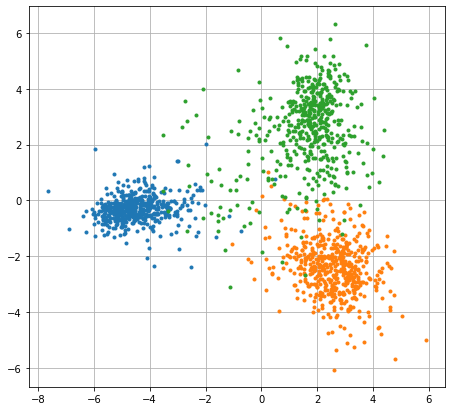

In [36]:
# Pergunta 2.c)
lda=LDA().fit(X1p,y1)
X1l=lda.transform(X1p)
X2l=lda.transform(X2p)
print(X2l.shape)
plt.figure(figsize=(10,7))
plt.plot(X2l[y2==1,0],X2l[y2==1,1],'.')
plt.plot(X2l[y2==4,0],X2l[y2==4,1],'.')
plt.plot(X2l[y2==7,0],X2l[y2==7,1],'.')
plt.axis('scaled')
plt.grid(True)
# Pergunta 2.d)
svm.fit(X1l,y1)
y2e=svm.predict(X2l)
print('Matriz de confusão:')
print(confusion_matrix(y2,y2e))
print('Número total de erros no conjunto de teste:%d'%np.sum(y2!=y2e))